In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df.job_skills.apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head()

/opt/anaconda3/envs/python_data_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [2]:
fake_data = {
  "job_skills": ["Python", "SQL", "Java", "C++", "C#"],
  "skill_count": [30, 25, 20, 15, 10],
  "skill_pay": [100, 90, 80, 70, 60]
}

df_fake = pd.DataFrame(fake_data)
df_fake

,job_skills,skill_count,skill_pay
0,Python,30,100
1,SQL,25,90
2,Java,20,80
3,C++,15,70
4,C#,10,60


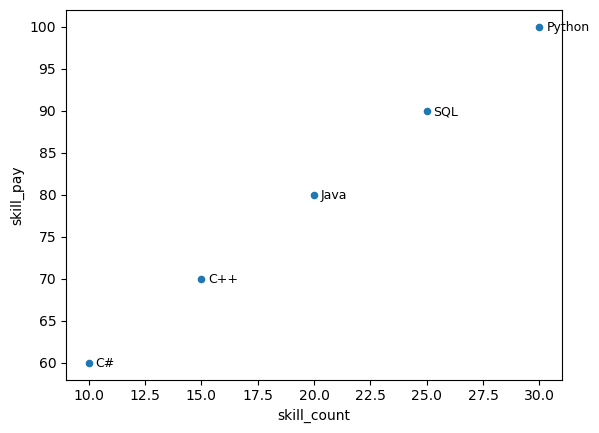

In [16]:
df_fake.plot(kind="scatter", x="skill_count", y="skill_pay")
for i, label in enumerate(df_fake["job_skills"]):
  plt.text(df_fake["skill_count"][i]+.3, df_fake["skill_pay"][i]-.5, label, fontsize=9)

In [17]:
df_DA = df[df["job_title_short"] == "Data Analyst"].copy()
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [18]:
df_DA = df_DA.explode("job_skills")

In [19]:
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [21]:
df_DA.job_skills.value_counts().head(10)

job_skills
sql           92428
excel         66860
python        57190
tableau       46455
power bi      39380
r             29996
sas           27998
powerpoint    13822
word          13562
sap           11280
Name: count, dtype: int64

In [50]:
#df_DA_pivot = df_DA.groupby(by=["job_skills"])["salary_year_avg"].aggregate(["median", "size"])
#df_DA_pivot.columns = ["median_salary", "skill_count"]

df_DA_pivot = df_DA.groupby("job_skills").agg(
  median_salary=("salary_year_avg", "median"), #new_column_name=(column_of_interest, aggregation_function),
  skill_count=("job_skills", "size") #new_column_name=(column_of_interest, aggregation_function)
)

df_DA_pivot.sort_values(by="skill_count", ascending=False, inplace=True)
df_DA_pivot = df_DA_pivot.head(10)
df_DA_pivot

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


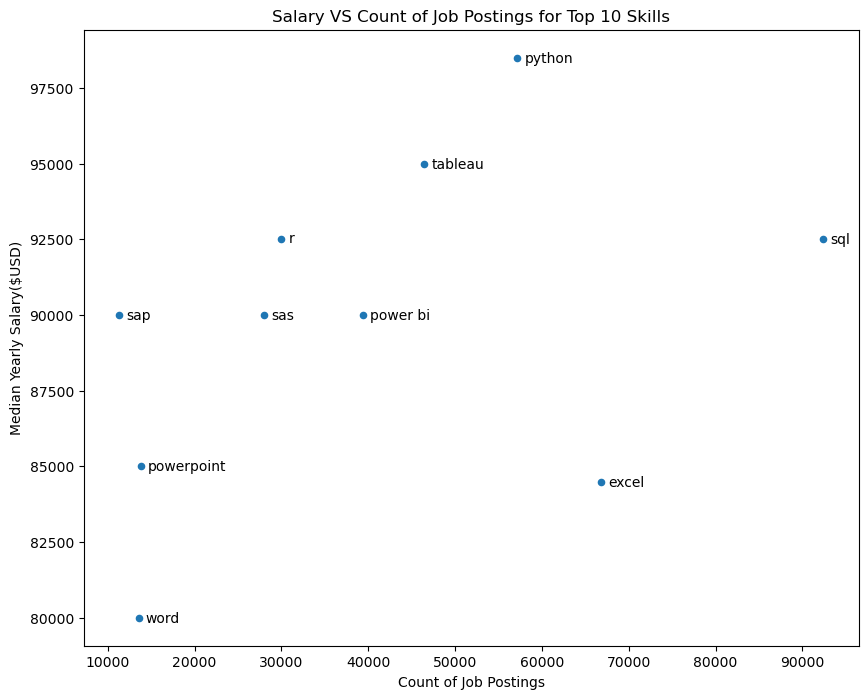

In [60]:
df_DA_pivot.plot(kind="scatter", x="skill_count", y="median_salary", figsize=(10, 8))
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary($USD)")
plt.title("Salary VS Count of Job Postings for Top 10 Skills")

for i, label in enumerate(df_DA_pivot.index):
  plt.text(df_DA_pivot["skill_count"].iloc[i]+800, df_DA_pivot["median_salary"].iloc[i]-140, label, fontsize=10)


In [63]:
df_countries = df[df["job_title_short"] == "Data Analyst"].groupby(by="job_country").agg(
  median_salary = ("salary_year_avg", "median"),
  job_count = ("job_country", "size")
)

df_countries = df_countries.sort_values("job_count", ascending=False).head(7)
df_countries

,median_salary,job_count
job_country,,
United States,90000.0,67816
France,69175.0,13803
United Kingdom,87750.0,10482
Germany,103750.0,7131
Singapore,99500.0,6632
India,100500.0,6121
Spain,91977.0,5177


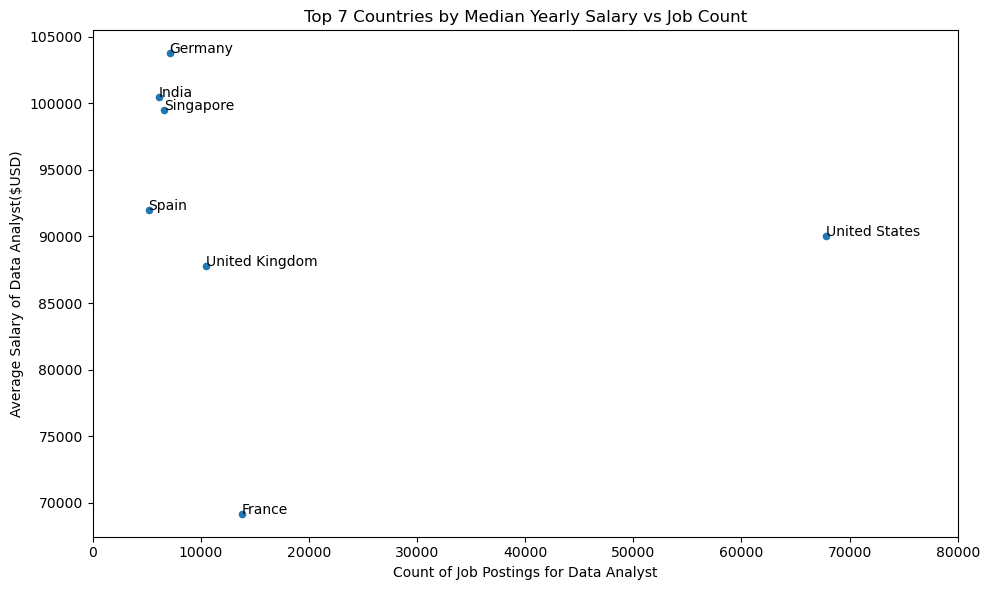

In [70]:
df_countries.plot(kind="scatter", x="job_count", y="median_salary", ylabel="Average Salary of Data Analyst($USD)", xlabel="Count of Job Postings for Data Analyst", title="Top 7 Countries by Median Yearly Salary vs Job Count", figsize=(10, 6), xlim=(0, 80000))

for i, label in enumerate(df_countries.index):
  plt.text(df_countries["job_count"].iloc[i], df_countries["median_salary"].iloc[i], label)

plt.tight_layout()

In [ ]:
df.groupby(by=["job_title_short", "job_schedule_type"]).size()
# df.groupby(by=["job_title_short", "job_schedule_type"]).agg(
#   median_salary=("salary_year_avg", "median"),
#   job_count=("job_schedule_type", "size")
# )

job_title_short    job_schedule_type        
Business Analyst   Contractor                    1693
                   Contractor and Internship        6
                   Contractor and Per diem          1
                   Contractor and Temp work       100
                   Full-time                    44106
                                                ...  
Software Engineer  Per diem                         1
                   Temp work                      120
                   Temp work and Full-time          1
                   Temp work and Internship         4
                   Volunteer                        1
Length: 263, dtype: int64

In [79]:
df_role_schedule = df.groupby(by=["job_title_short", "job_schedule_type"]).agg(
  median_salary=("salary_year_avg", "median"),
  job_count=("job_schedule_type", "size")
)
df_role_schedule = df_role_schedule.sort_values("job_count", ascending=False).head(10)
df_role_schedule

,,median_salary,job_count
job_title_short,job_schedule_type,,
Data Analyst,Full-time,90000.0,168975
Data Engineer,Full-time,125000.0,165225
Data Scientist,Full-time,128816.0,153278
Business Analyst,Full-time,86400.0,44106
Software Engineer,Full-time,99150.0,42314
Senior Data Engineer,Full-time,147500.0,41077
Senior Data Scientist,Full-time,157250.0,35233
Senior Data Analyst,Full-time,111175.0,27033
Machine Learning Engineer,Full-time,107900.0,12949


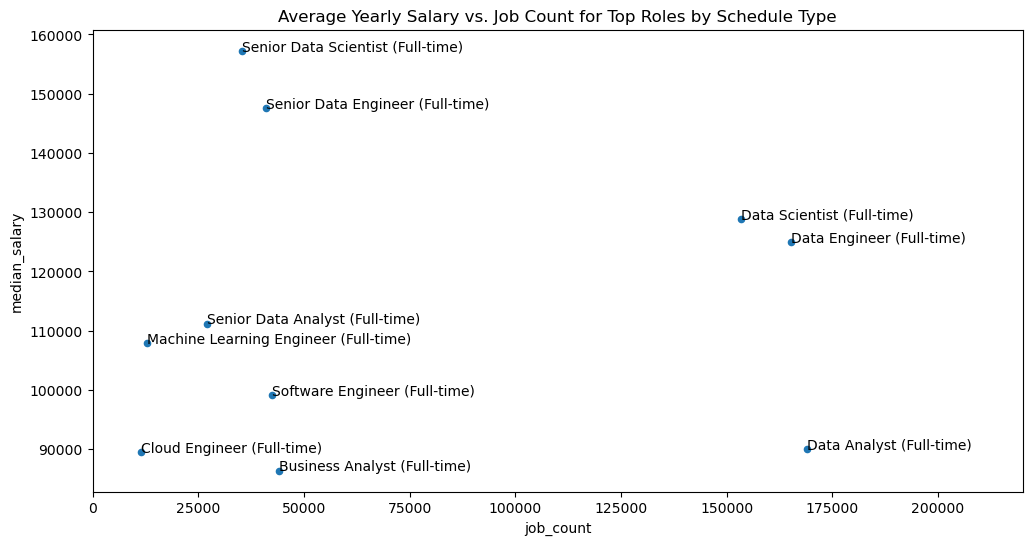

In [95]:
df_role_schedule.plot(kind="scatter", x="job_count", y="median_salary", figsize=(12, 6), xlim=(0,220000))
plt.title("Average Yearly Salary vs. Job Count for Top Roles by Schedule Type")

for i, role_by_schedule in enumerate(df_role_schedule.index):
  plt.text(df_role_schedule["job_count"].iloc[i], df_role_schedule["median_salary"].iloc[i], f"{role_by_schedule[0]} ({role_by_schedule[1]})")